In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
# import tensorflow as tf
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import the input dataset
tracks_path = 'Resources/pre_spotify_target_tracks.csv'
tracks_df = pd.read_csv(tracks_path)
tracks_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,1.0,0.045291,0.0,0.545455,0.8,0.000041,0.36,0.0,0.628658,0.599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.032864,0.0,0.181818,0.8,0.000230,0.48,0.0,0.629667,0.766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.040952,0.0,0.636364,0.8,0.000066,0.38,0.0,0.577195,0.608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.031660,0.0,0.181818,0.8,0.006968,0.73,0.0,0.258325,0.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.041927,0.0,0.363636,0.6,0.000201,0.44,0.0,0.624622,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Remove loan status target from features data
y = tracks_df.track_popularity
X = tracks_df.drop(columns=["track_popularity"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

## Model 1: Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# train model
model1 = LogisticRegression(solver="lbfgs",max_iter=1000)

# fit model
model1 = model1.fit(X_train, y_train)

# predict probability
pred_prob1 = model1.predict_proba(X_test)
prediction1 = model1.predict(X_test)

In [49]:
print(pred_prob1)

[[0.28315859 0.71684141]
 [0.65934105 0.34065895]
 [0.93926042 0.06073958]
 ...
 [0.73592937 0.26407063]
 [0.58246098 0.41753902]
 [0.54156567 0.45843433]]


In [50]:
print(prediction1)

[1. 0. 0. ... 0. 0. 0.]


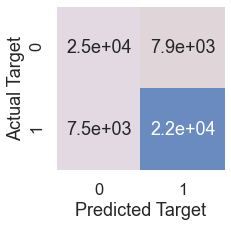

In [51]:
# Define a function to create a nicer looking confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap="twilight_r")
    plt.xlabel("Predicted Target")
    plt.ylabel("Actual Target")
plot_confusion_matrix(y_test, prediction1)

In [52]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction1)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction1))

Accuracy Score : 0.754071635207058
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77     33396
         1.0       0.73      0.74      0.74     29171

    accuracy                           0.75     62567
   macro avg       0.75      0.75      0.75     62567
weighted avg       0.75      0.75      0.75     62567



In [93]:
from joblib import dump, load
dump(model1, 'model1.joblib')

['model1.joblib']

In [107]:
model1 = load('model1.joblib')

## Model 2: Easy Ensemble AdaBoost Classifier

In [53]:
from imblearn.ensemble import EasyEnsembleClassifier

# Create a an easy ensemble classifier.
model2 = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# Fit the model
model2 =model2.fit(X_train, y_train)

# predict probability
pred_prob2 = model2.predict_proba(X_test)
prediction2 = model2.predict(X_test)

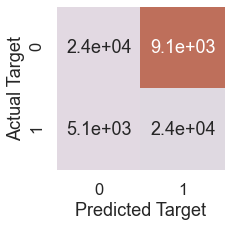

In [55]:
# Create the confusion matrix 
plot_confusion_matrix(y_test, prediction2)

In [56]:
# Calculate the balanced accuracy score
bac_score = balanced_accuracy_score(y_test, prediction2)

# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, prediction2))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.83      0.73      0.83      0.77      0.78      0.60     33396
        1.0       0.73      0.83      0.73      0.77      0.78      0.61     29171

avg / total       0.78      0.77      0.78      0.77      0.78      0.60     62567



In [118]:
dump(model2, 'model2.joblib')

['model2.joblib']

In [119]:
model2 = load('model2.joblib')

## Model 3: Decision Trees

In [110]:
from sklearn import tree

# Creating the decision tree classifier instance.
model3 = tree.DecisionTreeClassifier()

# Fit the model.
model3 = model3.fit(X_train, y_train)

# predict probability
pred_prob3 = model3.predict_proba(X_test)
prediction3 = model3.predict(X_test)

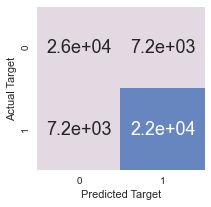

In [111]:
# Create the confusion matrix 
plot_confusion_matrix(y_test, prediction3)

In [59]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction3)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction3))

Accuracy Score : 0.7702143302379849
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78     33396
         1.0       0.75      0.75      0.75     29171

    accuracy                           0.77     62567
   macro avg       0.77      0.77      0.77     62567
weighted avg       0.77      0.77      0.77     62567



In [97]:
dump(model3, 'model3.joblib')

['model3.joblib']

In [112]:
model3 = load('model3.joblib')

## Model 4: Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier.
model4 = RandomForestClassifier(n_estimators=128, random_state=78)

# Fit the model
model4 =model4.fit(X_train, y_train)

# predict probability
pred_prob4 = model4.predict_proba(X_test)
prediction4 = model4.predict(X_test)

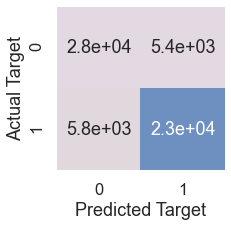

In [61]:
# Create the confusion matrix 
plot_confusion_matrix(y_test, prediction4)

In [62]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction4)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction4))

Accuracy Score : 0.8208959994885483
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83     33396
         1.0       0.81      0.80      0.81     29171

    accuracy                           0.82     62567
   macro avg       0.82      0.82      0.82     62567
weighted avg       0.82      0.82      0.82     62567



In [113]:
dump(model4, 'model4.joblib')

['model4.joblib']

In [114]:
model4 = load('model4.joblib')

In [65]:
# Calculate feature importance in the Random Forest model.
importances = model4.feature_importances_
importances

array([4.92632723e-02, 3.54758772e-03, 2.19194428e-02, 4.42689237e-03,
       9.80713575e-02, 1.35205777e-01, 2.52385151e-02, 4.16086732e-02,
       4.73704738e-02, 5.65525333e-02, 5.66946856e-03, 4.09846181e-02,
       6.77827663e-02, 3.70663812e-02, 3.97907951e-02, 3.99713599e-02,
       3.97483508e-02, 8.03006429e-02, 1.62795538e-01, 1.80860104e-05,
       1.86618760e-06, 3.72769328e-04, 1.33797690e-03, 9.54856050e-04])

In [66]:
# Sort the features by their importance.
sorted(zip(model4.feature_importances_, X.columns), reverse=True)

[(0.1627955378634159, 'Year'),
 (0.13520577663468678, 'artist_popularity'),
 (0.09807135753213296, 'followers'),
 (0.0803006429446147, 'artist_frequency'),
 (0.06778276633883316, 'acousticness'),
 (0.05655253331586161, 'loudness'),
 (0.04926327225381895, 'duration_ms'),
 (0.04737047377792277, 'energy'),
 (0.041608673188075845, 'danceability'),
 (0.04098461811392373, 'speechiness'),
 (0.03997135988781151, 'valence'),
 (0.03979079512395767, 'liveness'),
 (0.03974835082311226, 'tempo'),
 (0.03706638115043169, 'instrumentalness'),
 (0.025238515088427657, 'unique_playlists'),
 (0.0219194428456509, 'key'),
 (0.005669468557811401, 'mode'),
 (0.004426892366560551, 'time_signature'),
 (0.003547587717384794, 'explicit'),
 (0.001337976899455958, 'genres_hoerspiel'),
 (0.0009548560502136342, 'genres_other'),
 (0.00037276932789014424, 'genres_filmi'),
 (1.8086010401747903e-05, 'genres_classic bollywood'),
 (1.8661876036570969e-06, 'genres_desi pop')]

In [67]:
# Format the values in 2 decimals 
pd.set_option('display.float_format', "{:.2f}".format)

In [68]:
# Create a dataframe and sort the values in descending order
feature_importance_df = pd.DataFrame({"features": X.columns, "feature_importance": model4.feature_importances_})
feature_importance_df = feature_importance_df.sort_values("feature_importance", ascending=False).reset_index(drop=True)
feature_importance_df.head(30)

,features,feature_importance
0,Year,0.16
1,artist_popularity,0.14
2,followers,0.10
3,artist_frequency,0.08
4,acousticness,0.07
5,loudness,0.06
6,duration_ms,0.05
7,energy,0.05
8,danceability,0.04
9,speechiness,0.04


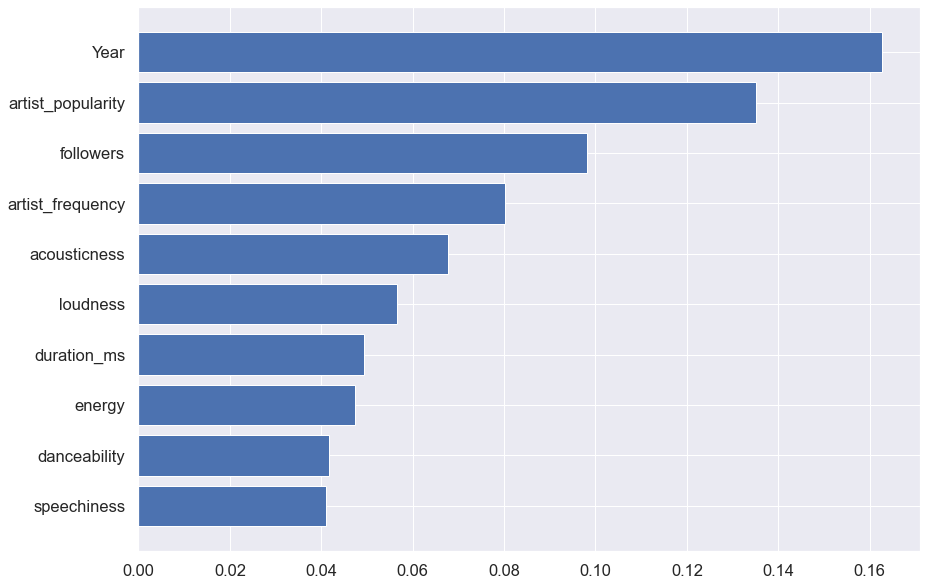

In [69]:
# Plot the dataframe for the first ten observations
fig,ax = plt.subplots(figsize=(14,10)) 
ax.barh(feature_importance_df['features'][:10],
       feature_importance_df['feature_importance'][:10])
ax.invert_yaxis()

In [71]:
# Drop the 5 columns with low rank
tracks_dropped_df = tracks_df.drop(['genres_classical era', 'genres_classical', 'genres_sufi'
                                   , 'genres_vintage tango', 'genres_tango'], axis='columns')
tracks_dropped_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,liveness,valence,tempo,artist_frequency,Year,genres_classic bollywood,genres_desi pop,genres_filmi,genres_hoerspiel,genres_other
0,1.00,0.05,0.00,0.55,0.80,0.00,0.36,0.00,0.63,0.60,...,0.07,0.38,0.57,0.00,0.93,0.00,0.00,0.00,0.00,1.00
1,1.00,0.03,0.00,0.18,0.80,0.00,0.48,0.00,0.63,0.77,...,0.11,0.55,0.39,0.00,0.87,0.00,0.00,0.00,0.00,1.00
2,0.00,0.04,0.00,0.64,0.80,0.00,0.38,0.00,0.58,0.61,...,0.34,0.56,0.43,0.01,0.64,0.00,0.00,0.00,0.00,1.00
3,1.00,0.03,0.00,0.18,0.80,0.01,0.73,0.00,0.26,0.90,...,0.08,0.56,0.78,0.03,0.64,0.00,0.00,0.00,0.00,1.00
4,1.00,0.04,0.00,0.36,0.60,0.00,0.44,0.00,0.62,0.52,...,0.10,0.31,0.58,0.00,0.88,0.00,0.00,0.00,0.00,1.00


In [115]:
# Remove loan status target from features data
y = tracks_dropped_df.track_popularity
X = tracks_dropped_df.drop(columns=["track_popularity"])

# Split training/test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier.
model5 = RandomForestClassifier(n_estimators=128, random_state=78)

# Fit the model
model5 =model5.fit(X_train1,y_train1)

# predict probability
pred_prob5 = model5.predict_proba(X_test1)
prediction5 = model5.predict(X_test1)

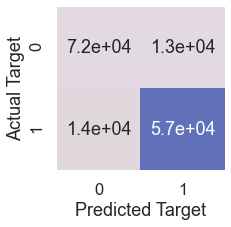

In [74]:
# Create the confusion matrix 
plot_confusion_matrix(y_test1, prediction5)

In [75]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test1, prediction5)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test1, prediction5))

Accuracy Score : 0.8260313644761825
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     85467
         1.0       0.81      0.80      0.81     70952

    accuracy                           0.83    156419
   macro avg       0.82      0.82      0.82    156419
weighted avg       0.83      0.83      0.83    156419



In [101]:
dump(model5, 'model5.joblib')

['model5.joblib']

In [102]:
model5 = load('model5.joblib')

By droping 5 columns from the family of genres, the accuracy score of the model has not changed significantly. Therefore, it is preferable to keep all the features.    

## ROC Evaluation

### Notes
ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [117]:
from sklearn.metrics import roc_curve

# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2,tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

In [79]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [80]:
from sklearn.metrics import roc_auc_score

# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score3, auc_score4)

0.8271983036500067 0.7698983085020141 0.9076138763413288


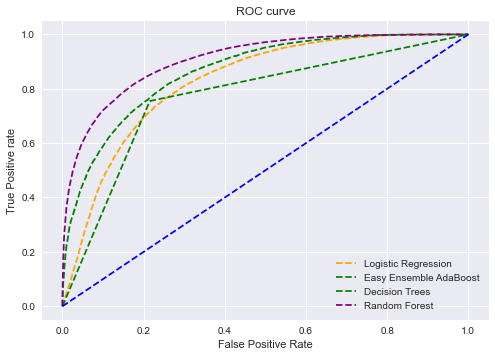

In [81]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Easy Ensemble AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Decision Trees')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Results
It is evident from the plot that the AUC for the Random Forest ROC curve is higher than that for other ROC curves. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

## K-Fold Cross Validation

In [82]:
# Import required library
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_curve
import statistics as st

In [87]:
k = 10
kf = KFold(n_splits=k, random_state=None)

# Train the model
model = LogisticRegression(solver= 'liblinear')

acc_score = []
pred_prob_list = []
prediction_list = []
fpr_list = []
tpr_list = []
thresh_list = []
auc_scores = []
 
for train_index , test_index in kf.split(X):    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    # Fit the model
    model = model.fit(X_train,y_train)
         
    # Predict probability
    pred_prob = model.predict_proba(X_test)
    prediction = model.predict(X_test)
    
        
    # Calculating the accuracy score.
    acc = accuracy_score(y_test, prediction)
    acc_score.append(acc)
    
        
    # Displaying results
    print("Classification Report:")
    print(classification_report(y_test, prediction))
    
    # Add the probability and prediction to the list
    pred_prob_list.append(pred_prob)
    prediction_list.append(prediction)
    
    # ROC curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    
    # Add fpr, tpr and thresh in the lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    thresh_list.append(thresh)
    
    # AUC scores
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    auc_scores.append(auc_score)
    print(f"auc_score: {auc_score}")
    
# Calculate the median and average accuracy score
avg_acc_score = sum(acc_score)/k
print(f"Median Accuracy Score : {st.median(acc_score)}")
print(f"Average Accuracy Score : {avg_acc_score}")  

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80     35669
         1.0       0.73      0.74      0.74     26899

    accuracy                           0.77     62568
   macro avg       0.77      0.77      0.77     62568
weighted avg       0.77      0.77      0.77     62568

auc_score: 0.8495663579898065
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79     34754
         1.0       0.73      0.74      0.74     27814

    accuracy                           0.77     62568
   macro avg       0.76      0.76      0.76     62568
weighted avg       0.77      0.77      0.77     62568

auc_score: 0.8439209411458046
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79     34459
         1.0       0.74      0.74      0.74     28109

    accuracy                           0.76     62568

In [103]:
dump(model, 'model.joblib')

['model.joblib']

In [104]:
model = load('model.joblib')

In [105]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

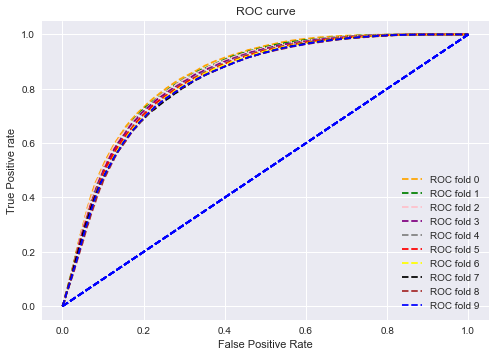

In [106]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

color = ['orange', 'green', 'pink', 'purple', 'gray', 'red', 'yellow', 'black', 'brown', 'blue']

for i in range(len(fpr_list)):
    # plot roc curves
    plt.plot(fpr_list[i], tpr_list[i], linestyle='--',color=color[i], label='ROC fold {}'.format(i))
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

The accuracy score obtained in each fold  indicates that the overfitting did not occure on the model 
and the model works properly through all the folds.
